In [65]:
# auto-reload imports 
%load_ext autoreload
%autoreload 2
%time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 30 µs, sys: 20 µs, total: 50 µs
Wall time: 74.9 µs


In [66]:

import mc.replay_analysis.functions.model_rdms as model_rdms
import mc.replay_analysis.functions.data_rdms as data_rdms
import mc.analyse.analyse_MRI_behav as analyse_MRI_behav
from mc.analyse.searchlight import get_volume_searchlight
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
from tqdm import tqdm
sns.set_style('dark')
# from rsatoolbox.util.searchlight import get_volume_searchlight
from nilearn.image import load_img
import pickle



In [67]:

SUB = "sub-02"
SUBJECT_DIRECTORY = '/Users/student/PycharmProjects/data/derivatives/' + SUB + '/'
EVS_TYPE = 'instruction_period'
TASK_HALVES = ['1', '2']
RDM_VERSION = '01'

## Get the EVs Dictionary 
Make sure that out conditions are labeled
Remove the task halves. Just have a naming convention that keeps track of this. 

In [68]:

# Create dictionary to store the data for each EV for both task halves
# Convert the output of this to be pandas arrays

EVs_both_halves_dict = {
    '1': None,
    '2': None
}
# create new dictionary to store the 2D array of EVs for both task halves
EVs_both_halves_2d = EVs_both_halves_dict.copy()

    
EVs_path_dict = data_rdms.get_EV_path_dict(
    subject_directory = SUBJECT_DIRECTORY,
    EVs_type = EVS_TYPE
    )

# Load in the EVs for the instruction periods from the dictionary of paths
EVs_data_dict = data_rdms.load_EV_data(
    EVs_path_dict = EVs_path_dict,
    RDM_VERSION = RDM_VERSION
)

# Unravel the values of each EV
EVs_data_dict = data_rdms.unravel_EV_data(EVs_data_dict)
EVs_data_dict = pd.DataFrame(EVs_data_dict)


# get column names
column_names = EVs_data_dict.columns.tolist()
for idx, name in enumerate(column_names):
    column_names[idx] = name[3:7]
    

# column_names
EVs_data_dict.rename(columns=dict(zip(EVs_data_dict.columns.tolist(), column_names)), inplace=True)

conditions = data_rdms.get_standard_order()
# reorder the columns 
EVs_data_dict.loc[:, conditions]


# EVs_data_dict[]

,A1_f,A1_b,B1_f,B1_b,C1_f,C1_b,D1_f,D1_b,E1_f,E1_b,A2_f,A2_b,B2_f,B2_b,C2_f,C2_b,D2_f,D2_b,E2_f,E2_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Get the Searchlights
- Requires the mask file

In [69]:

# Load binary mask of the brain
mask = load_img(f"{SUBJECT_DIRECTORY}/anat/{SUB}_T1w_noCSF_brain_mask_bin_func_01.nii.gz")
print(mask.shape)
mask = mask.get_fdata()
print(mask.shape)




(108, 108, 64)
(108, 108, 64)


In [70]:

# Get list of voxel centers and their volume neighbours
centers, vol_neighbors = get_volume_searchlight(
    mask = mask,
    radius = 3,
    threshold = 0.5)


# Deals with searchlights that are not the correct size
vol_neighbors = data_rdms.resize_neighbors(
    vol_neighbors = vol_neighbors,
    size = 93
)
%timeit




















Data Searchlights Running:   0%|          | 0/1000 [20:13<?, ?it/s]



































































Finding searchlights...: 100%|██████████| 168204/168204 [00:10<00:00, 15530.75it/s]


Found 166240 searchlights


In [71]:
vol_searchlight = data_rdms.create_vol_searchlight_dataframe(
    vol_neighbors = vol_neighbors,
    centers = centers
)


data_searchlight = data_rdms.get_data_searchlight(
    vol_searchlight = vol_searchlight,
    EVs_data_dict = EVs_data_dict,
)

%timeit

Creating searchlights...: 166240it [11:44, 236.02it/s]                    


In [10]:

# # save data_searchlight to a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'wb') as f:
#     pickle.dump(data_searchlight, f)

# load data_searchlight from a pickle file
with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'rb') as f:
    data_searchlight = pickle.load(f)


## Get the RDMs for each searchlight
- Data structure here, requires that the RDMs have condition labels (that will come from the EVs condition labels)

In [15]:
# get first 1000 entries o data_searchlight dictionary

# data_searchlight = {k: data_searchlight[k] for k in list(data_searchlight)[:1000]}


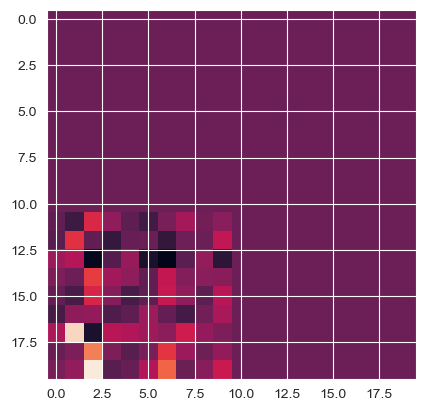

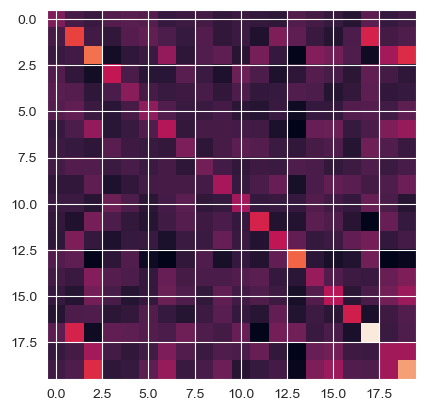

In [97]:
data_searchlight[433185]

rdm1 = np.zeros((len(data_searchlight[433185].columns), len(data_searchlight[433185].columns)))
rdm2 = np.zeros((len(data_searchlight[433185].columns), len(data_searchlight[433185].columns)))

for ev1_idx, EV in enumerate(data_searchlight[433185]):
    for ev2_idx, EV2 in enumerate(data_searchlight[433185]):
        if ev1_idx > 10 and ev2_idx < 10:
            rdm1[ev1_idx, ev2_idx] = np.dot(data_searchlight[433185][EV], data_searchlight[433185][EV2])
        rdm2[ev1_idx, ev2_idx] = np.dot(data_searchlight[433185][EV], data_searchlight[433185][EV2])



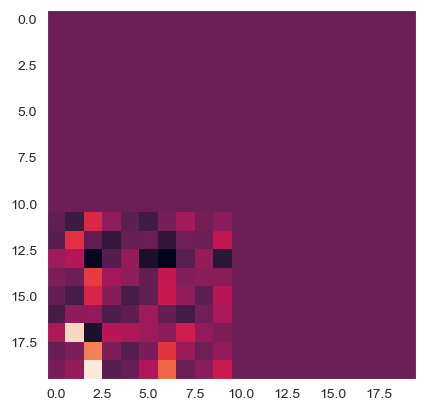

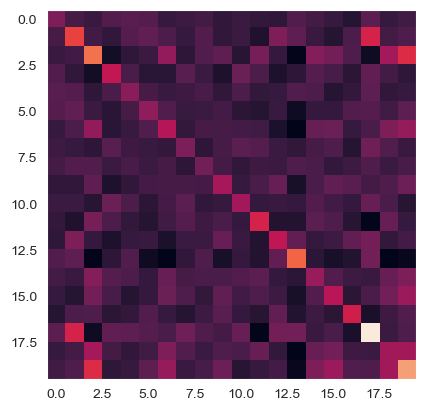

In [100]:

sns.set_style('dark')
plt.imshow(rdm1)
plt.show()
plt.imshow(rdm2)
plt.show()

In [99]:
# create test df of EVs for the conditons
# data_searchlight = dict(data_searchlight.items()[:100])

# create dictionary of data rdms
data_rdms_dict = data_rdms.get_data_rdms(
    data_searchlight = data_searchlight,
    SIZE = 'cross_corr'
    )



















































































































































































































































































































































































































































/Users/student/anaconda3/envs/rsa/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/student/anaconda3/envs/rsa/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]









































































/Users/student/anaconda3/envs/rsa/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c 

In [77]:

data_rdms_dict.keys()

dict_keys([147475, 147538, 147539, 147540, 147601, 147602, 147603, 147604, 147605, 147666, 147667, 147668, 147731, 154129, 154130, 154131, 154192, 154193, 154194, 154195, 154196, 154197, 154198, 154199, 154256, 154257, 154258, 154259, 154260, 154261, 154262, 154263, 154264, 154320, 154321, 154322, 154323, 154324, 154325, 154326, 154327, 154328, 154383, 154384, 154385, 154386, 154387, 154388, 154389, 154390, 154391, 154392, 154446, 154447, 154448, 154449, 154450, 154451, 154452, 154453, 154454, 154455, 154456, 154510, 154511, 154512, 154513, 154514, 154515, 154516, 154517, 154518, 154519, 154520, 154574, 154575, 154576, 154577, 154578, 154579, 154580, 154581, 154582, 154583, 154584, 154639, 154640, 154641, 154642, 154643, 154644, 154645, 154646, 154647, 154703, 154704, 154705, 154706, 154707, 154708, 154709, 154710, 154711, 154768, 154769, 154770, 154771, 154772, 154773, 154774, 154775, 154833, 154835, 154836, 154837, 154838, 154839, 154899, 154900, 154901, 154902, 154903, 154963, 15496

In [79]:

data_rdms_dict[list(data_rdms_dict.keys())[0]]

# check if any of the pandas dfs contain NaN or zeros
for key in data_rdms_dict.keys():
    if data_rdms_dict[key].isnull().values.any():
        print(f"NaN values in {key}")
    if (data_rdms_dict[key] == 0).values.any():
        print(f"Zero values in {key}")

NaN values in 231104
NaN values in 238016
NaN values in 238080
NaN values in 244928
NaN values in 244992
NaN values in 251840
NaN values in 251904
NaN values in 251968
NaN values in 258752
NaN values in 258816
NaN values in 258880
NaN values in 265664
NaN values in 265728
NaN values in 265792
NaN values in 272512
NaN values in 272576
NaN values in 272640
NaN values in 272704
NaN values in 279424
NaN values in 279488
NaN values in 279552
NaN values in 279616
NaN values in 279680
NaN values in 286336
NaN values in 286400
NaN values in 286464
NaN values in 286528
NaN values in 286592
NaN values in 293248
NaN values in 293312
NaN values in 293376
NaN values in 293440
NaN values in 293504
NaN values in 300160
NaN values in 300224
NaN values in 300288
NaN values in 300352
NaN values in 300416
NaN values in 300480
NaN values in 307072
NaN values in 307136
NaN values in 307200
NaN values in 307264
NaN values in 307328
NaN values in 307392
NaN values in 313984
NaN values in 314048
NaN values in

In [82]:
data_rdms_dict[528256], data_rdms_dict[440159]

(      A2_f  A2_b  B2_f  B2_b  C2_f  C2_b  D2_f  D2_b  E2_f  E2_b
 A1_f   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 A1_b   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 B1_f   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 B1_b   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 C1_f   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 C1_b   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 D1_f   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 D1_b   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 E1_f   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
 E1_b   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN,
               A2_f          A2_b          B2_f          B2_b          C2_f  \
 A1_f  3.330669e-15  0.000000e+00  3.000000e+00  0.000000e+00  3.000000e+00   
 A1_b  3.000000e+00  3.000000e+00  0.000000e+00  3.000000e+00  2.331468e-15   
 B1_f  3.000000e+00  3.000000e+00  1

In [56]:
# save data_rdms_dict to a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'wb') as f:
#     pickle.dump(data_rdms_dict, f)

# # load data_searchlight from a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'rb') as f:
#     data_searchlight = pickle.load(f)

%timeit

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (10).

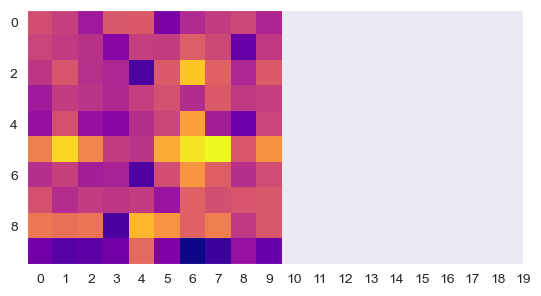

In [57]:
# Plot the searchlight RDMS
center = 161427

data_rdms.plot_rdm(
    df = data_rdms_dict,
    idx = center,
    SIZE = 'between_halves'
    )

In [58]:
# load data_rdms_dict from a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'rb') as f:
#     data_rdms_dict = pickle.load(f)

# data_rdms_dict[161427].shape

(10, 10)

In [74]:
# # load data_rdms_dict from a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'rb') as f:
#     data_rdms_dict = pickle.load(f)


# convert to triangle vectors for RSA
data_rdms_tri = data_rdms.get_data_rdms_tri(
    data_rdms_dict = data_rdms_dict
    )

# Get the conditions in the correct order
conditions = data_rdms.get_standard_order()

# RETURNING THE INCORRECT DICTIONARY. GETTING AN ERROR
model_rdms_dict = model_rdms.get_model_rdms(
    conditions = conditions, 
    TYPE = 'replay', 
    SIZE = 'cross_corr')


model_rdms_dict_tri = data_rdms.get_data_rdms_tri(
    data_rdms_dict = model_rdms_dict
    )




eval_result = Parallel(n_jobs=1)(delayed(data_rdms.evaluate_model)(
    Y = model_rdms_dict_tri['replay'],                                                      # Model that is being evaluated              
    X = data_rdms_tri[searchlight]
    ) for searchlight in tqdm(data_rdms_tri.columns, desc = "Data Searchlights Running"))   # (from the list of data RDMs)

data_rdms.save_RSA_result(
    eval_result = eval_result,
    searchlight = data_rdms_tri.columns,
    subject_directory = SUBJECT_DIRECTORY
    )


ValueError: zero-size array to reduction operation maximum which has no identity